# Image processing and Principal Component Analysis

We use `sklearn` implementation of principal componet analysis for which the documentation can be found:
* [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [PCA example with Iris Data-set](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)
* [PCA using Python scikit-learn](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)


We also visualise colorspaces of images to capture some important aspects.
Since the colorspace is inherently three dimensional we use package `ipyvolume` for making three dimensional plots interactive. Further details about his package can be obtained from

* [Ipyvolume documentation](https://ipyvolume.readthedocs.io/en/latest/)
* [Maarten Breddels, Interactive 3D Visualization in Jupyter, SciPy 2018, Youtube](https://www.youtube.com/watch?v=hOKa8klJPyo)
* [Maarten Breddels, Interactive 3D Visualization in Jupyter, SciPy 2018, Jupyter Notebook](https://github.com/maartenbreddels/talk-ipyvolume-scipy2018/blob/master/ipyvolume-presentation.ipynb)



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import sklearn

from pandas import Series
from pandas import DataFrame
from typing import Tuple

from tqdm import trange

from sklearn.decomposition import PCA

from plotnine import *
from mizani.formatters import percent_format

# Local imports
from common import *
from convenience import *

## I. Crash course to sklearn.decomposition.PCA

* To apply PCA you must first define a PCA transformation object $Y$  and then apply the `fit` function.
  * Recall that each row vector in $Y$ is an observation $\boldsymbol{y}_i$.
  
  
* Only after that can you read out the main outcomes of the PCA analysis:
  * shift vector $\boldsymbol{\mu}$
  * rotation matrix $W=(\boldsymbol{w}_1 \boldsymbol{w}_2 \ldots\boldsymbol{w}_n)$
  * eigenvalues $\lambda_1\geq \lambda_2\geq\ldots\geq \lambda_n$ corresponding to eigenvectors in the rotation matrix.
  

* The following facts capture the essence of PCA transformation:  
  * The shift  vector $\boldsymbol{\mu}$ is just the mean of observations $\boldsymbol{y}_1,\ldots,\boldsymbol{y}_m$.
  * The matrix $W$ rotates centered observations $\boldsymbol{y}_i-\boldsymbol{\mu}$ so that the variance is maximal in the first direction.
  * The corresponding transformation $\boldsymbol{\xi}=W(\boldsymbol{y}-\boldsymbol{\mu})$ is known as PCA transformation.
  * The inverse PCA transformation is $\boldsymbol{y}=W\boldsymbol{\xi}+\boldsymbol{\mu}$ as $W$ is ortogonal matrix.


### How to fit PCA on a data matrix 

* For clarity we use illustrative labels for columns and rows. 
* There is no need to do this under normal circumstances.

In [2]:
obs_labels = [r'$\boldsymbol{{y}}_{}$'.format(i+1) for i in range(6)]
X = DataFrame(np.array(
    [[-1, -1], 
     [-2, -1], 
     [-3, -2], 
     [ 1,  1], 
     [ 2,  1], 
     [ 3,  2]]), columns=['$x_1$', '$x_2$'], index= obs_labels)
caption = r'Data matrix with coordinates $x_1$ and $x_2$ and observations $\boldsymbol{y}_1, \ldots, \boldsymbol{y}_6$'
mdisplay([X], [caption], index=True)

# You can spscify how many principal components we need to find
pca = PCA(n_components=2)
pca.fit(X)

Data matrix with coordinates $x_1$ and $x_2$ and observations $\boldsymbol{y}_1, \ldots, \boldsymbol{y}_6$ 
 
 
 
 $x_1$ 
 $x_2$ 
 
 
 
 
 $\boldsymbol{y}_1$ 
 -1 
 -1 
 
 
 $\boldsymbol{y}_2$ 
 -2 
 -1 
 
 
 $\boldsymbol{y}_3$ 
 -3 
 -2 
 
 
 $\boldsymbol{y}_4$ 
 1 
 1 
 
 
 $\boldsymbol{y}_5$ 
 2 
 1 
 
 
 $\boldsymbol{y}_6$ 
 3 
 2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### How to extract main outcomes of PCA analysis

* For clarity we use illustrative labels for columns and rows. 
* There is no need to do this under normal circumstances.

In [3]:
W = DataFrame(pca.components_, columns = ['$x_1$', '$x_2$'], index = ['PCA1', 'PCA2'])
Lambda = DataFrame(pca.explained_variance_, columns=['$\lambda$'], index = ['PCA1', 'PCA2'])
mu = DataFrame(pca.mean_, columns=[r'$\boldsymbol{\mu}$'], index = ['$x_1$', '$x_2$']).T

mdisplay([Lambda, W, mu], 
         ['Loadings', 'Rotation matrix', 'Center of gravity'], index=True)

Loadings Rotation matrix Center of gravity 
 
 
 
 $\lambda$ 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 
 $x_1$ 
 $x_2$ 
 
 
 
 
 PCA1 
 -0.838492 
 -0.544914 
 
 
 PCA2 
 0.544914 
 -0.838492 
 
 
 
 
 
 
 $x_1$ 
 $x_2$ 
 
 
 
 
 $\boldsymbol{\mu}$ 
 0.0 
 0.0

### The amount of explained variance

* Projection onto  PCA componets looses some information.
* Loadings show how much variance each component explains separately.  
* Cumulative variance shows how much variance is covered by first $k$ components.
* Cumulative variance can be computed as sum since PCA components are uncorrelated. 

In [4]:
var = DataFrame(pca.explained_variance_, columns = ['variance'], index = ['PCA1', 'PCA2'])
rel_var = DataFrame(100*pca.explained_variance_ratio_, columns = ['variance'], index = ['PCA1', 'PCA2'])
rel_cum_var = rel_var.cumsum()
mdisplay([Lambda, var, rel_var, rel_cum_var], 
         ['Loadings', 'Explained absolute variance', 'Explained relative variance'],
        index=True)

Loadings Explained absolute variance Explained relative variance 
 
 
 
 $\lambda$ 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 
 variance 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 
 variance 
 
 
 
 
 PCA1 
 99.244289 
 
 
 PCA2 
 0.755711 
 
 
 
 
 
 
 variance 
 
 
 
 
 PCA1 
 99.244289 
 
 
 PCA2 
 100.000000

### PCA transformation and its inverse transformation

In [5]:
XI = DataFrame(pca.transform(X), columns = [r'$\xi_1$', r'$\xi_2$'])
X2 = DataFrame(pca.inverse_transform(pca.transform(X)), columns = ['x1', 'x2'])
mdisplay([X, XI, W.dot(X.T).T, X2], 
    ['Original data','PCA transformation', 'Theoretical formula', 'PCA + PCA$^{-1}$'])



Original data PCA transformation Theoretical formula PCA + PCA$^{-1}$ 
 
 
 $x_1$ 
 $x_2$ 
 
 
 
 
 -1 
 -1 
 
 
 -2 
 -1 
 
 
 -3 
 -2 
 
 
 1 
 1 
 
 
 2 
 1 
 
 
 3 
 2 
 
 
 
 
 
 $\xi_1$ 
 $\xi_2$ 
 
 
 
 
 1.383406 
 0.293579 
 
 
 2.221898 
 -0.251335 
 
 
 3.605304 
 0.042244 
 
 
 -1.383406 
 -0.293579 
 
 
 -2.221898 
 0.251335 
 
 
 -3.605304 
 -0.042244 
 
 
 
 
 
 PCA1 
 PCA2 
 
 
 
 
 1.383406 
 0.293579 
 
 
 2.221898 
 -0.251335 
 
 
 3.605304 
 0.042244 
 
 
 -1.383406 
 -0.293579 
 
 
 -2.221898 
 0.251335 
 
 
 -3.605304 
 -0.042244 
 
 
 
 
 
 x1 
 x2 
 
 
 
 
 -1.0 
 -1.0 
 
 
 -2.0 
 -1.0 
 
 
 -3.0 
 -2.0 
 
 
 1.0 
 1.0 
 
 
 2.0 
 1.0 
 
 
 3.0 
 2.0

## II. Image sampling and processing functions

In the following we are going to apply principal component analysis to compress images by splitting the image into $(2d+1)\times (2d+1)$ patches and converting them to one-dimensipnal vectors.
For simplicity we consider only grayscale images. You have to consider the general RGB case in the home exercises.  

### Luminocity based grayscale conversion

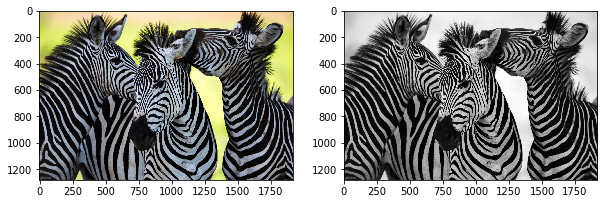

In [6]:
image = plt.imread('data/zebras.png')
bw_image = convert_to_grayscale(image)

fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(bw_image, cmap ='gray')

### Extraction of texture windows with corresponding labels

For every coordinate $(x,y)$ we extract a $(2d+1)\times(2d+1)$ window centered in $(x,y)$.
For simplicity, we ignore all coordinates where one of the following conditions is satisfied:

\begin{align*}
&\begin{aligned}
x&< d\,,\\
x&\geq m-d\,,
\end{aligned}
&
&\begin{aligned}
y&< d\,,\\
y&\geq n-d\,.
\end{aligned}
\end{align*}



In [7]:
def extract_texture_vectors(bw_image: np.array, x: np.array, y:np.array, m: int, n: int, d: int) -> DataFrame:
    
    index = (d <= x) & (x < m - d) & (d <= y) & (y < n - d)
    xm = x[index]
    ym = y[index]
    
    x0 = xm - d
    x1 = xm + d + 1
    y0 = ym - d
    y1 = ym + d + 1
    
    r = len(xm)
    textures = np.empty([r, (2 * d + 1)**2])
    for i in range(r):
        textures[i, :] = bw_image[x0[i]:x1[i], y0[i]:y1[i]].flatten()
        
    columns = ['x{:02d}'.format(i+1) for i in range((2*d+1)**2)]   
    return (DataFrame(textures, columns = columns)
            .assign(xm = Series(xm).astype(int))
            .assign(ym = Series(ym).astype(int))
            [['xm', 'ym'] + columns])

Simple test that the function works as expected.

In [8]:
d1 = 1
m = 10
n = 10
x =np.array(range(11))
y = x 
index = (d1 <= x) & (x < m - d1) & (d1 <= y) & (y < n - d1)
tmp = extract_texture_vectors(bw_image, x, y, m, n , d=d1)
mdisplay([tmp, DataFrame(bw_image[x[index], y[index]], columns = ['luma'])], ['textures', 'midpoints'])

textures midpoints 
 
 
 xm 
 ym 
 x01 
 x02 
 x03 
 x04 
 x05 
 x06 
 x07 
 x08 
 x09 
 
 
 
 
 1 
 1 
 0.671853 
 0.671853 
 0.670959 
 0.667932 
 0.667932 
 0.667038 
 0.664011 
 0.664011 
 0.667932 
 
 
 2 
 2 
 0.667932 
 0.667038 
 0.667038 
 0.664011 
 0.667932 
 0.667932 
 0.664011 
 0.664011 
 0.664011 
 
 
 3 
 3 
 0.667932 
 0.667932 
 0.667038 
 0.664011 
 0.664011 
 0.663117 
 0.660090 
 0.664011 
 0.664011 
 
 
 4 
 4 
 0.664011 
 0.663117 
 0.667038 
 0.664011 
 0.664011 
 0.667932 
 0.660090 
 0.664011 
 0.667932 
 
 
 5 
 5 
 0.664011 
 0.667932 
 0.667038 
 0.664011 
 0.667932 
 0.667038 
 0.664011 
 0.667932 
 0.667932 
 
 
 6 
 6 
 0.667932 
 0.667038 
 0.667038 
 0.667932 
 0.667932 
 0.667932 
 0.667932 
 0.667932 
 0.671853 
 
 
 7 
 7 
 0.667932 
 0.667932 
 0.667038 
 0.667932 
 0.671853 
 0.667038 
 0.662881 
 0.662881 
 0.678566 
 
 
 8 
 8 
 0.671853 
 0.667038 
 0.670959 
 0.662881 
 0.678566 
 0.678566 
 0.670724 
 0.678566 
 0.678566 
 
 
 
 
 
 luma 
 
 
 
 
 0.667932 
 
 
 0.667932 
 
 
 0.664011 
 
 
 0.664011 
 
 
 0.667932 
 
 
 0.667932 
 
 
 0.671853 
 
 
 0.678566

### The actual extraction of random texture windows 

Note that with a small probability returns replicas of the same window. 

In [9]:
d = 7
r = 5000
m, n = dim(bw_image)
x = np.random.choice(range(d, m - d), size=r, replace = True)
y = np.random.choice(range(d, n - d), size=r, replace = True)
df = extract_texture_vectors(bw_image, x, y, m, n , d)
head(df)

,xm,ym,x01,x02,x03,x04,x05,x06,x07,x08,...,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225
0,280,171,0.094773,0.114379,0.105129,0.077681,0.094260,0.106470,0.112905,0.116826,...,0.133091,0.156618,0.164460,0.164013,0.156171,0.132644,0.105196,0.089444,0.093365,0.097287
1,1094,53,0.125326,0.191986,0.342695,0.521939,0.614639,0.639381,0.628064,0.654383,...,0.619733,0.635460,0.627617,0.618645,0.610803,0.604368,0.596526,0.569078,0.561235,0.600447
2,434,875,0.062225,0.062225,0.066146,0.066146,0.066146,0.054383,0.050462,0.058304,...,0.058473,0.048117,0.055960,0.075118,0.039828,0.085988,0.282047,0.571893,0.705213,0.745597
3,155,264,0.741300,0.671166,0.622704,0.619398,0.573686,0.495642,0.464206,0.423520,...,0.532570,0.658115,0.677298,0.657758,0.722141,0.767854,0.749656,0.764446,0.795816,0.772289
4,95,1316,0.897276,0.901197,0.901197,0.897276,0.897276,0.897276,0.897276,0.897276,...,0.905100,0.905100,0.905100,0.905100,0.905100,0.905100,0.905100,0.905100,0.905100,0.905100


Visualisation of first 20 images

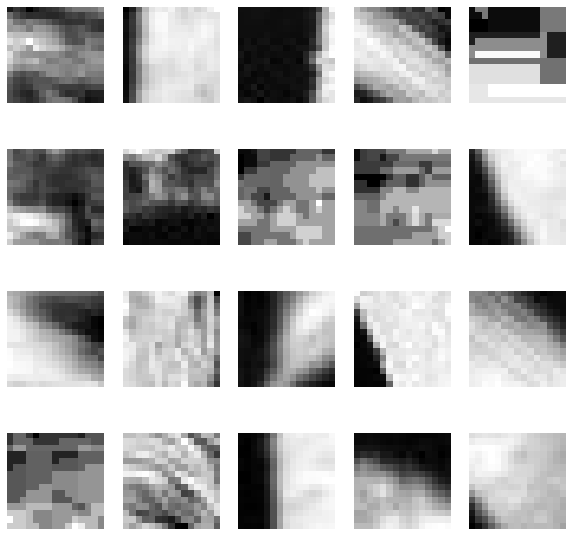

In [10]:
fig=plt.figure(figsize=(10,10))
for i in range(20):
    fig.add_subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(df.iloc[i, 2:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

## III. Principal components and image decomposition

As we can interpret each texture window as a one-dimensional observation we can apply principal component analysis directly on the textures and omit components that cover minute proportion of variance.

In [11]:
pca = PCA()
X = df.iloc[:, 2:]
pca.fit(X)
comp_labels = ['PCA_{}'.format(i + 1) for i in range(len(df.columns[2:]))]
W = DataFrame(pca.components_, columns=df.columns[2:], index=comp_labels)
Lambda = DataFrame(pca.explained_variance_, columns=['lambda'], index=comp_labels)
mu = DataFrame(pca.mean_, index=df.columns[2:]).T
XC = df.iloc[:, 2:].sub(mu.iloc[0], axis=1)

### The amount of variance explained by principal components 

As expected most of the variance is explained by few principal components.

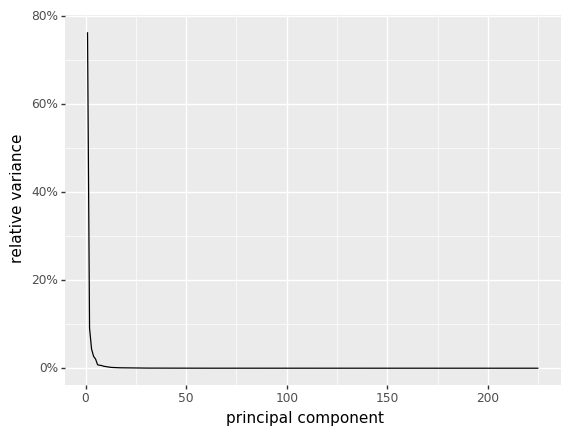

<ggplot: (327702967)>

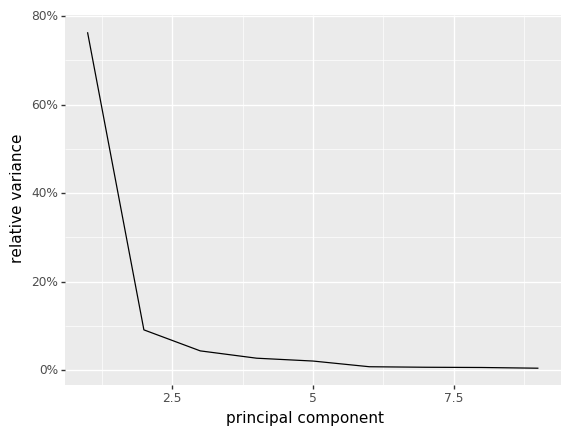

<ggplot: (329921551)>

In [12]:
loadings = DataFrame({
    'principal_component': [i + 1 for i in range(len(pca.explained_variance_ratio_))],
    'relative_variance': pca.explained_variance_ratio_
})

p = ggplot(loadings)
p = p + geom_line(aes(x='principal_component', y='relative_variance'))
p = p + scale_y_continuous(name='relative variance', labels=percent_format())
p = p + scale_x_continuous(name='principal component')
display(p)

p = ggplot(loadings.iloc[:9])
p = p + geom_line(aes(x='principal_component', y='relative_variance'))
p = p + scale_y_continuous(name='relative variance', labels=percent_format())
p = p + scale_x_continuous(name='principal component')
p


### Corresponding principal images

Principal components have a very clear interpretation. They are differences that are added to the mean image to re-create original texture window.  The following figure visualises them together with the mean image. 

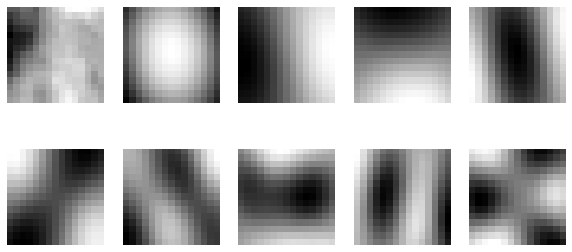

In [13]:
fig=plt.figure(figsize=(10,10))

# Mean image
fig.add_subplot(4, 5, 1)
plt.axis('off')
plt.imshow(mu.values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

for i in range(9):
    fig.add_subplot(4, 5, i + 2)
    plt.axis('off')
    plt.imshow(W.iloc[i,:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

### Image gamut for first two components

As first two components explain around 90% of the variance, it is interesting to see what kind of images their combinations create. For that we measure the variance of  $\xi_1$ and $\xi_2$ and then create images covering this range:

* We center the data matrix.
* We apply PCA transformation.
* We compute 90% quantiles for $\xi_1$ and $\xi_2$. 

In [14]:
# Lets create data matrix and apply the transformation 
XI=DataFrame(pca.transform(X)[:,:2], columns=['xi1', 'xi2'])
ranges = XI.quantile(q=[0.05, 0.95]).rename(index={0.05:'low', 0.95:'high'}).T
ranges

,low,high
xi1,-5.590470,7.626628
xi2,-2.815778,2.847008


Let us now synthesize images 

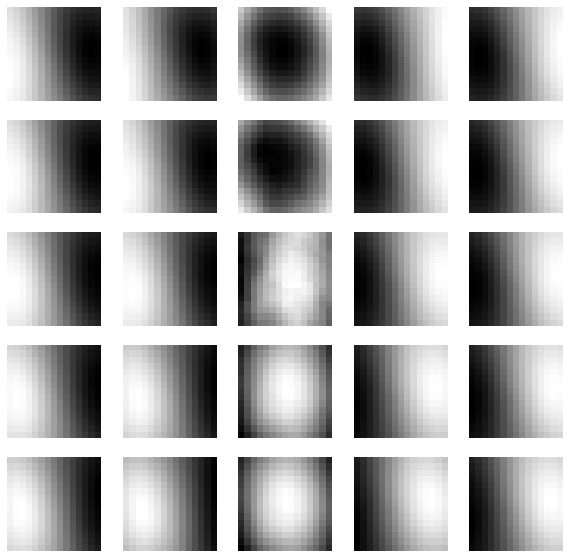

In [15]:
fig=plt.figure(figsize=(10,10))

i = 1
for xi1 in np.linspace(ranges.loc['xi1', 'low'], ranges.loc['xi1', 'high'] , 5):
    for xi2 in np.linspace(ranges.loc['xi2', 'low'], ranges.loc['xi2', 'high'], 5):
        x = mu + xi1 * W.iloc[0,:] + xi2 * W.iloc[1, :]
        fig.add_subplot(5, 5, i)
        plt.axis('off')
        plt.imshow(x.values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')
        i += 1
        
    

### Corresponding reconstructions for two components

Although the first two components explain about 90% of total variance over the individual textures, the corresponding image reconstruction quality is quite low. However there are many images for which the reconstruction is really good.   

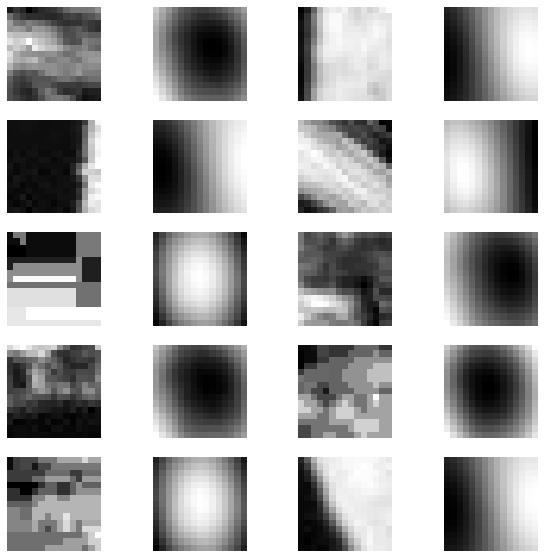

In [16]:
XI = DataFrame(pca.transform(X)[:,:2], columns=['PCA_1', 'PCA_2'])
rec = W.T.iloc[:, :2].dot(XI.iloc[:,:2].T).add(mu.iloc[0], axis=0)

fig=plt.figure(figsize=(10,10))
for i in range(10):
    # Original 
    fig.add_subplot(5, 4, 2 * i + 1)
    plt.axis('off')
    plt.imshow(df.iloc[i, 2:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')
    # Reconstruction
    fig.add_subplot(5, 4, 2 * i + 2)
    plt.axis('off')
    plt.imshow(rec.iloc[:, i].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')    

Lets compute means-square reconstruction error for all images and compare it with the reconstruction error for the mean image. According to theory, the mean square error must be strictly smaller when we use two components. 

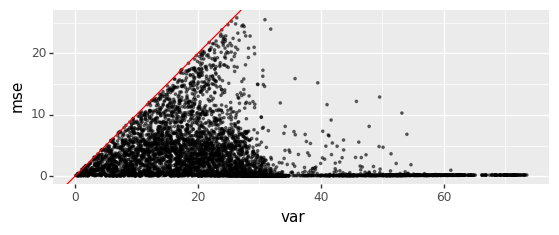

<ggplot: (330036502)>

In [17]:
difference = X - rec.T 
mse = (difference**2).sum(axis=1)
var = (XC**2).sum(axis=1)
edf = DataFrame({'i': list(range(len(mse))), 'mse':mse, 'var':var})

p = ggplot(edf)
p = p + geom_point(aes(x = 'var', y = 'mse'), size=0.5, alpha=0.5)
p = p + geom_abline(aes(intercept=0, slope=1), color='red')
p = p + coord_fixed(ratio=1)
p

Also note that the average means square error is indeed around 10% as predicted by variance loadings.

In [18]:
np.mean(mse)/np.mean(var)*100

14.548878904166926

### Corresponding reconstructions for nine components

If we use nine components the reconstruction is much better although all abrupt changes are still not tacked.  

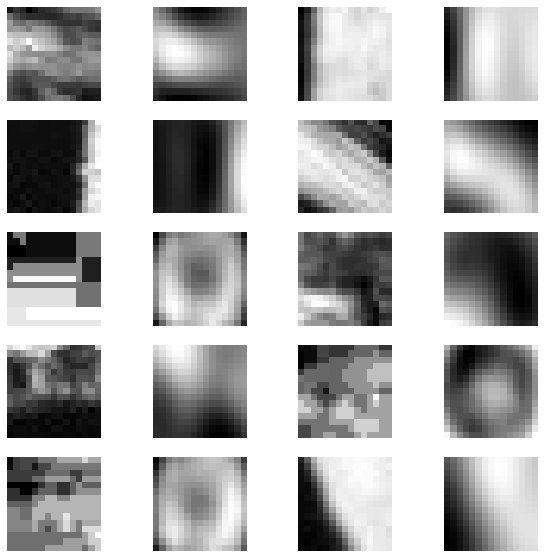

In [19]:
comp_labels = ['PCA_{}'.format(i + 1) for i in range(len(df.columns[2:]))]
XI=DataFrame(pca.transform(X), columns=comp_labels)
rec = W.T.iloc[:, :9].dot(XI.iloc[:,:9].T).add(mu.iloc[0], axis=0)

fig=plt.figure(figsize=(10,10))
for i in range(10):
    # Original 
    fig.add_subplot(5, 4, 2 * i + 1)
    plt.axis('off')
    plt.imshow(df.iloc[i, 2:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')
    # Reconstruction
    fig.add_subplot(5, 4, 2 * i + 2)
    plt.axis('off')
    plt.imshow(rec.iloc[:, i].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')    

Lets compare means-square reconstruction error with the reconstruction error for the mean image.

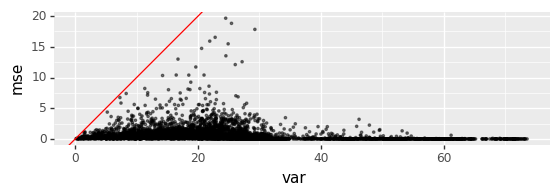

<ggplot: (331516515)>

In [20]:
difference = X - rec.T 
mse = (difference**2).sum(axis=1)
var = (XC**2).sum(axis=1)
edf = DataFrame({'i': list(range(len(mse))), 'mse':mse, 'var':var})

p = ggplot(edf)
p = p + geom_point(aes(x = 'var', y = 'mse'), size=0.5, alpha=0.5)
p = p + geom_abline(aes(intercept=0, slope=1), color='red')
p = p + coord_fixed(ratio=1)
p

## IV. Why are principal images so generic?

Principal component decomposition can be viewed as a way to express image as a linear combination of few principal images with minimal mean square error. 
Under this premise it seem strange that the principal components for zerbra image are blobs and vetical and horizonal gradients while the image consists of stripes. 


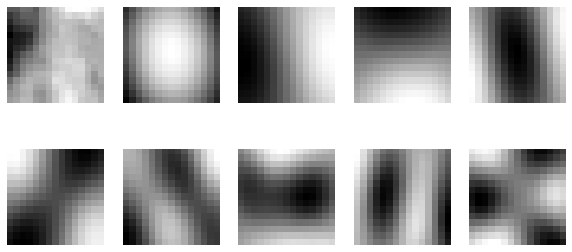

In [21]:
fig=plt.figure(figsize=(10,10))

# Mean image
fig.add_subplot(4, 5, 1)
plt.axis('off')
plt.imshow(mu.values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

for i in range(9):
    fig.add_subplot(4, 5, i + 2)
    plt.axis('off')
    plt.imshow(W.iloc[i,:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

The reason behind this is offset. As we sample images in random locations the stripes are shifted by a random amount. Thus the image cannot be deconstructed into a simple set of stripes. 
However, if we sample images with where the offset of stripes is roughly the same we indeed get striped principal images. 


### Selection of similar images

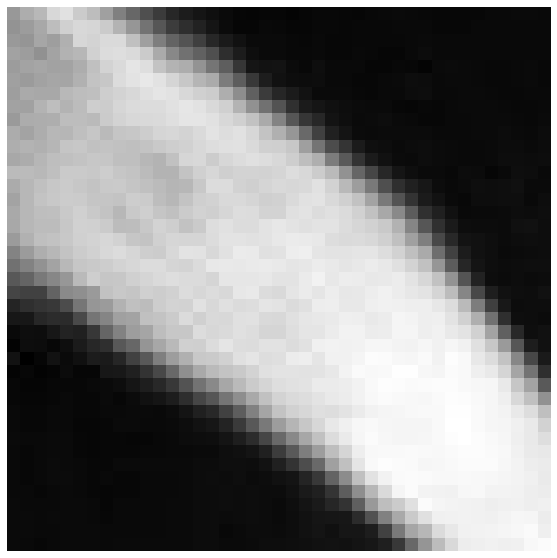

In [22]:
d = 20
r = 5000
x0 = 600
y0 = 100
m, n = dim(bw_image)
x = np.random.choice(range(d, m - d), size=r, replace = True)
y = np.random.choice(range(d, n - d), size=r, replace = True)
x[0] = x0
y[0] = y0
df = extract_texture_vectors(bw_image, x, y, m, n , d)
seed_image = df.iloc[0, 2:]
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(seed_image.values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

Let us look for similar images by computing scalar product between different images.

In [23]:
X = df.iloc[:, 2:]

# Center texture  
X = X.sub(X.mean(axis=1), axis=0)
# Normalise texture
X = X.div(X.std(axis=1), axis=0)

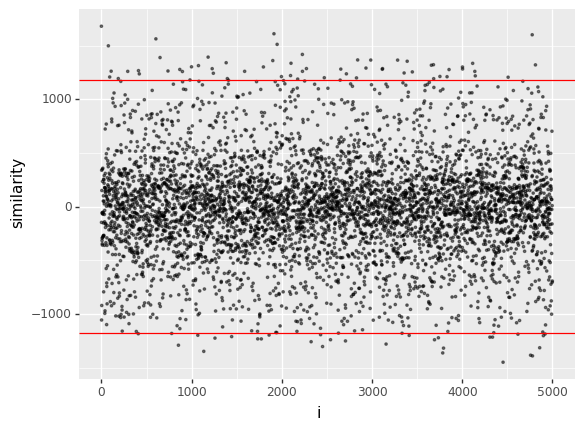

<ggplot: (-9223372036527246967)>

In [25]:
sdf = DataFrame({'i': list(range(r)), 'similarity': X.dot(X.iloc[0])})
st = 0.7 * sdf.loc[0, 'similarity']
p = ggplot(sdf)
p = p + geom_point(aes(x = 'i', y = 'similarity'), size=0.5, alpha=0.5)
p = p + geom_hline(aes(yintercept=st), color='red')
p = p + geom_hline(aes(yintercept=-st), color='red')
p

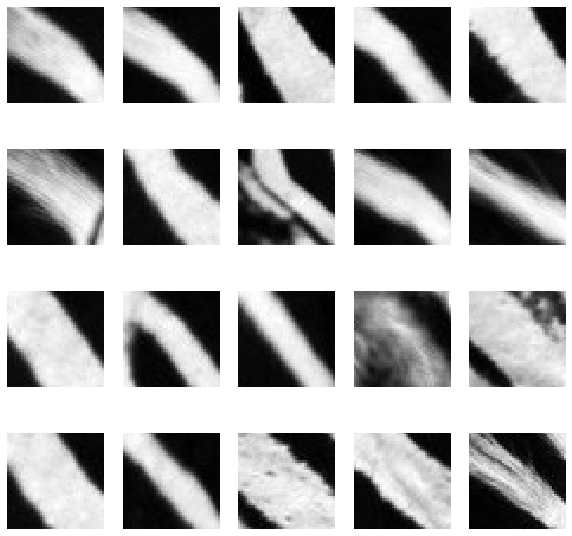

In [26]:
df2=df[sdf['similarity'] >= st]

fig=plt.figure(figsize=(10,10))
for i in range(20):
    fig.add_subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(df2.iloc[i, 2:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

### Image decompostion with principal component analysis
Let compare principal components of a selected textures with principal components of random selection

In [27]:
pca = PCA()
pca.fit(df2.iloc[:, 2:])
comp_labels = ['PCA_{}'.format(i + 1) for i in range(len(pca.components_))]
Ws = DataFrame(pca.components_, columns=df2.columns[2:], index=comp_labels)
pca.fit(df.iloc[:, 2:])
comp_labels = ['PCA_{}'.format(i + 1) for i in range(len(pca.components_))]
Wr = DataFrame(pca.components_, columns=df.columns[2:], index=comp_labels)

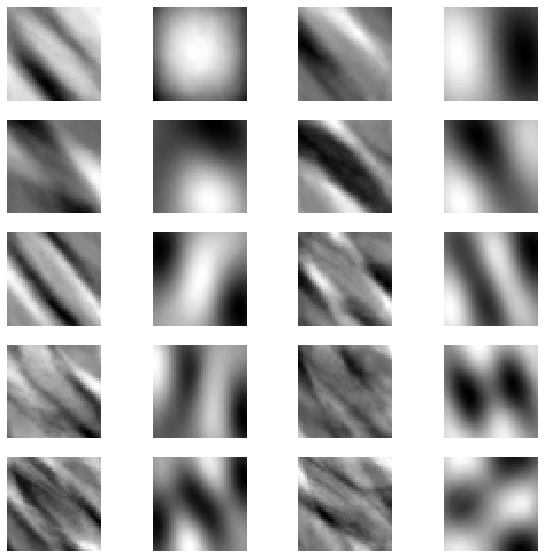

In [28]:
fig=plt.figure(figsize=(10,10))

for i in range(10):
    fig.add_subplot(5, 4, 2 * i + 1)
    plt.axis('off')
    plt.imshow(Ws.iloc[i,:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')
    fig.add_subplot(5, 4, 2 * i + 2)
    plt.axis('off')
    plt.imshow(Wr.iloc[i,:].values.reshape(2 * d + 1, 2 * d + 1), cmap = 'gray')

    

# Homework

## 3.1 Dedicated image compression algoritm (<font color='red'>3p</font>) 

Implement image comression algorithm based on principal component analysis:
* Find principal images using principal componant analysis. 
* Spit image into small textures and keep only the coordinates of few principal components.
* Reconstruct the image and measure the means square error.
* Measure the number of floats needed to store the image.
* Estimate visually how many componets are needed to keep image quality.

Draw a plot where in x-axis is the compression ratio and in y-axis is the mean square error.
For simplicity define compression ratio by considering the number of required floats that includes the description of principal images compared to the number of floats needed to describe the entire image. 
Add also the horizontal line for the mean square error below which images are visually indistinquishable. Interpret the result.


## 3.2 Comparison of principal components* (<font color='red'>3p</font>)

We showed that there is a big difference whether principal components are computed for randomly selected textures of for textures that are quite similar. Analyse this further by annotating image pixels with principal images:
* For each pixel we can extract a texture and apply PCA transformation.
* The corresponding PCA coordinates can be viewed as features.
* You can use RGB plot to show where these features have large values.
* You can use chroma to show how a single feature changes.

Compare the resulting activation maps of principal components obtained with both methods.  

